In [2]:
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
from PIL import Image
from math import pi
import cv2

In [3]:
# Размеры 
width = 22.5 # mm
resolution = 6000 #px
fs = round((width/ resolution), 4)
period = round(1 / fs, 3)

print(fs)
print(period)

0.0037
270.27


In [4]:
# Функция для генерации сигнала 
def sin(x, frequency, phase):
    return 0.5 + 0.5*np.sin(frequency * x*np.pi + phase)

In [27]:
# Визуализация 
def get_image(y):
    print(min(y),max(y))
    y = np.array(y)*255
    x = np.array([y for _ in range(301)])
    data = Image.fromarray(x)
    plt.imshow(data)
    #plt.axis("off")
    plt.show()

In [29]:
# матрика по массиву
def get_mat(y):
    y = np.array(y)*255
    x = np.array([y for _ in range(301)])
    return x 

In [6]:
# Дискритизация сигнала по чистоте
def discretization(freq, phase):
    height = 300
    y = []
    x = 0.0
    print(freq)
    while x < 1/fs * height:
        y0 = integrate.quad(lambda x: sin(x, freq, phase), x, x+1/fs)[0]/period
        y.append(round(y0,2))
        x += 1/fs

    get_image(y)
    return y 

0.0007400000000000001
0.01 0.99


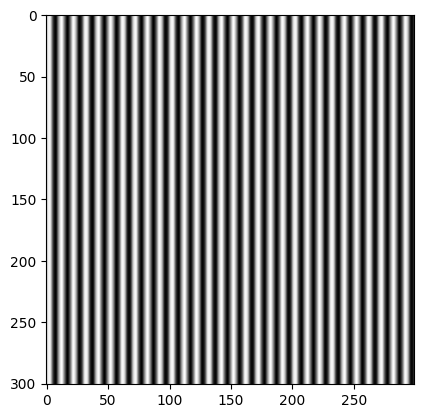

0.0012333333333333332
0.02 0.98


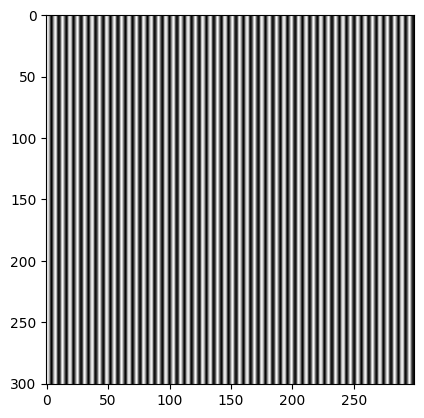

0.00185
0.18 0.82


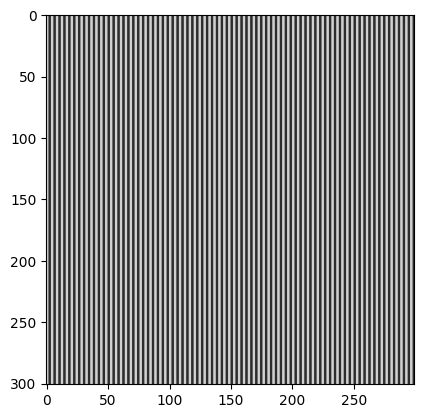

0.0037
0.18 0.82


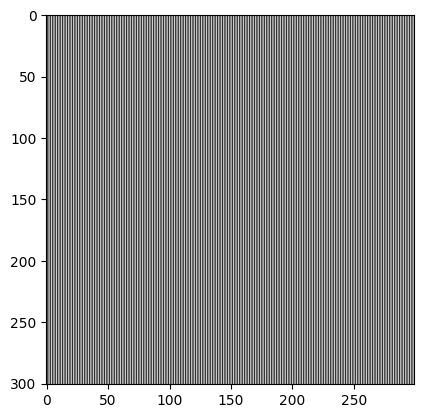

0.005217
0.32 0.68


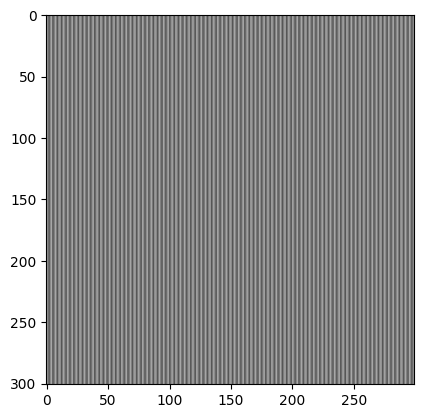

0.0074
0.5 0.5


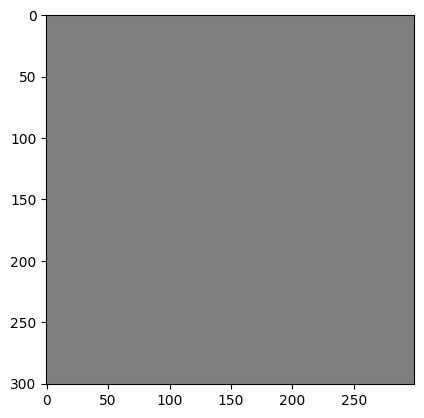

0.0111
0.39 0.61


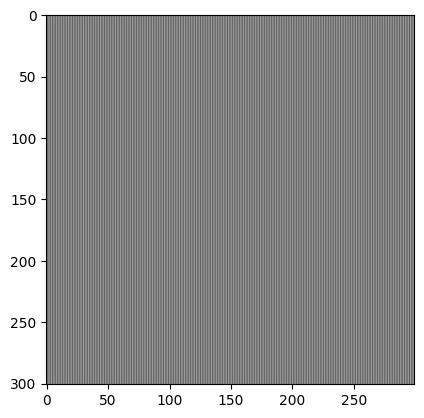

0.0148
0.5 0.5


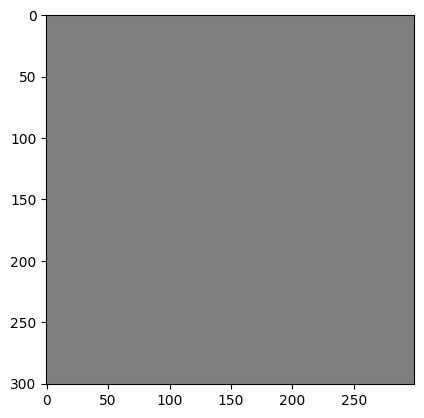

0.018500000000000003
0.44 0.56


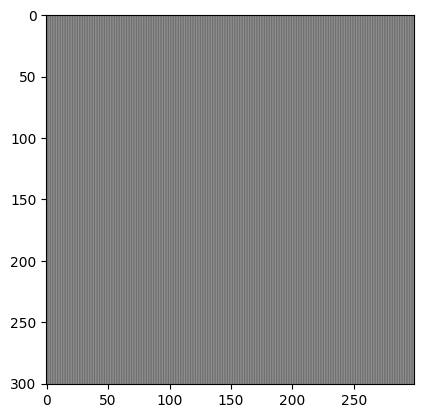

0.0222
0.5 0.5


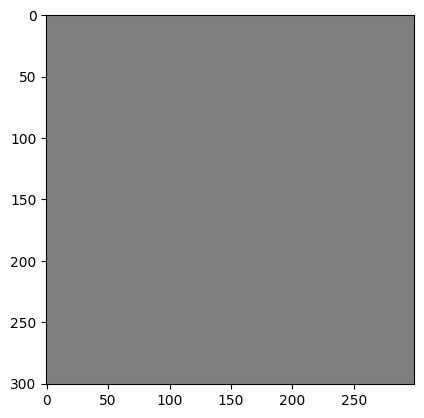

0.0259
0.45 0.55


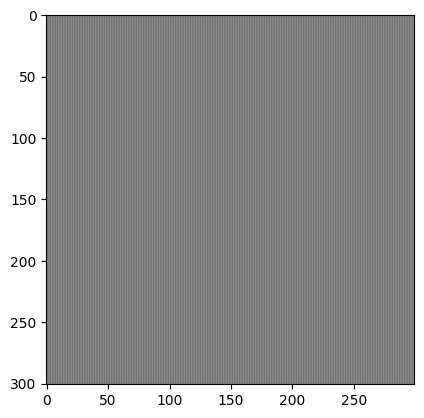

0.037000000000000005
0.5 0.5


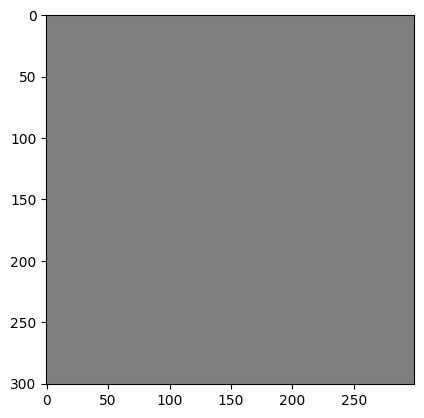

In [22]:

pars = [1/5, 1/3, 1/2, 1, 1.41, 2, 3, 4, 5, 6,7,10]
list_sample = []
for i, par  in enumerate(pars):
    list_sample.append(discretization(par*fs, 0))

0.0007400000000000001
0.02 0.98


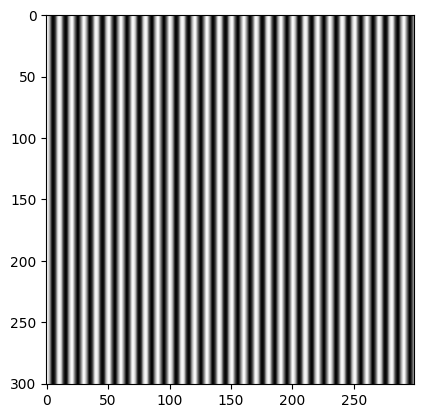

0.0012333333333333332
0.02 0.98


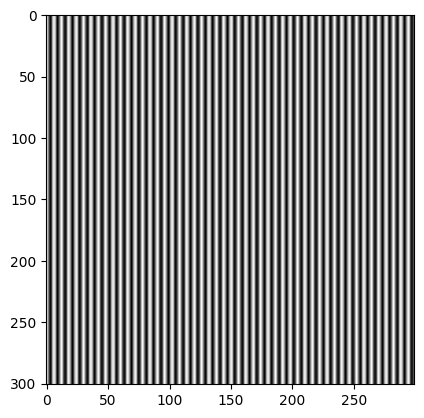

0.00185
0.06 0.94


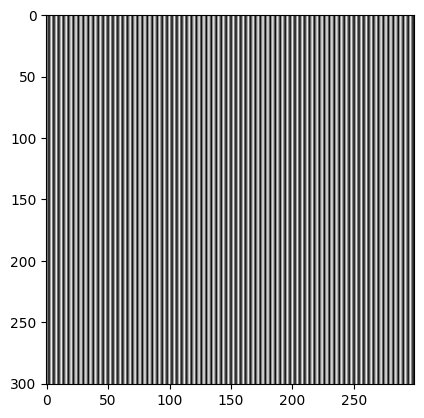

0.0037
0.33 0.67


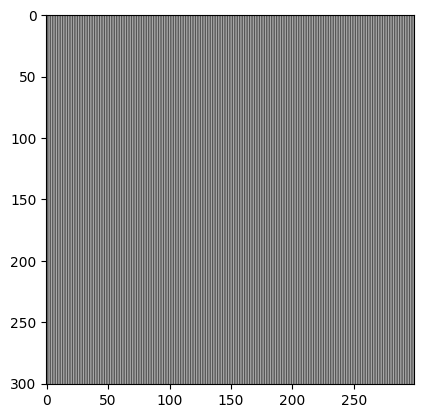

0.005217
0.32 0.68


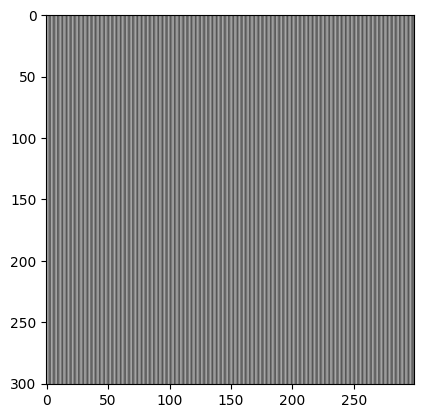

0.0074
0.5 0.5


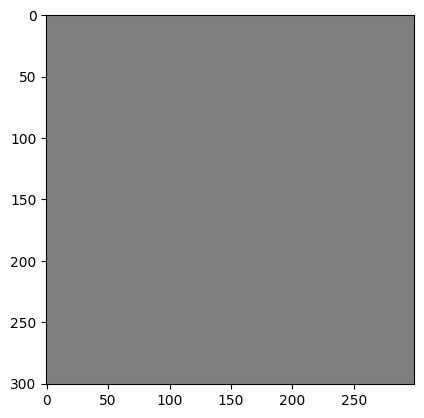

0.0111
0.44 0.56


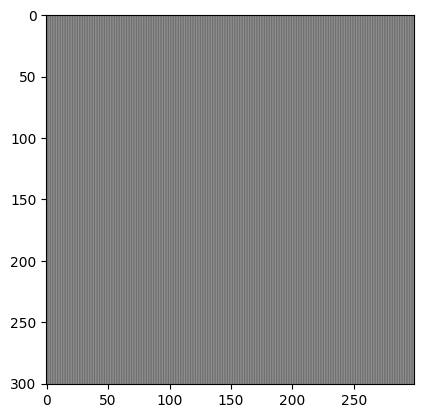

0.0148
0.5 0.5


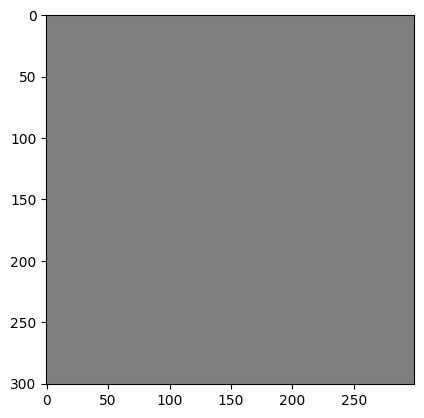

0.018500000000000003
0.47 0.53


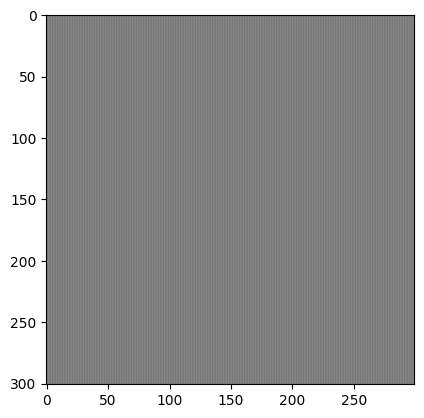

0.0222
0.5 0.5


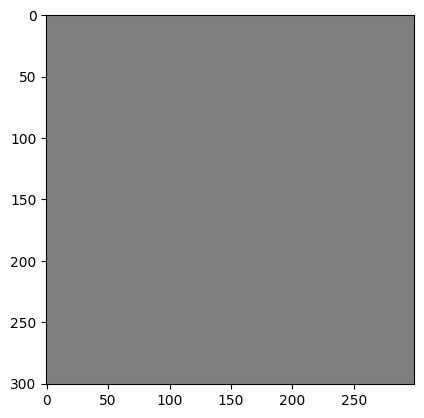

0.0259
0.48 0.52


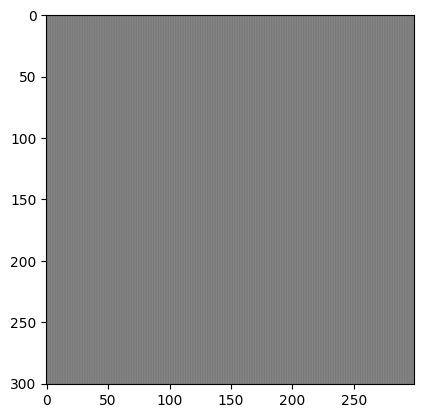

0.037000000000000005
0.5 0.5


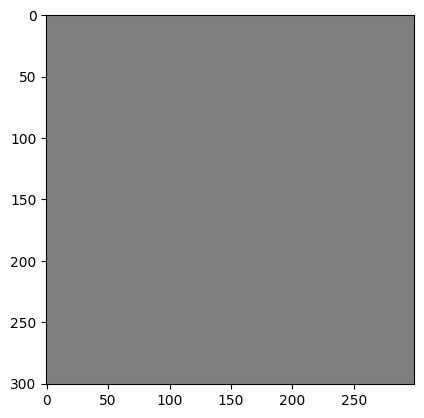

In [18]:
for i, par  in enumerate(pars):
    discretization(par*fs, 1)

Вывод:

В результате выполнения практической работы, оптимальный результат получается при частоте сигнала равной или больше частоте дискретизаии.